# Large experiment for HPL on Dahu

In [1]:
import io
import zipfile
import pandas
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

def read_result(name):
    archive = zipfile.ZipFile(name)
    return pandas.read_csv(io.BytesIO(archive.read('results.csv')))

df1 = pandas.concat([
    read_result('grenoble_2018-08-14_1808232.zip'),
    read_result('grenoble_2018-08-14_1808233.zip'),
])
df1['hyperthreading'] = True
df2 = pandas.concat([
    read_result('grenoble_2018-09-05_1809107.zip'),
    read_result('grenoble_2018-09-12_1809240.zip'),
])
df2['hyperthreading'] = False
df = pandas.concat([df1, df2])
df.head()

/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,bcast,block_size,depth,gflops,matrix_size,mem_align,pfact,proc_p,proc_q,process_per_node,residual,rfact,swap,thread_per_process,time,hyperthreading
0,2,128,1,4869.0,32768,8,1,16,32,32,0.001419,2,0,1,4.82,True
1,2,128,1,10890.0,131072,8,1,16,32,32,0.000820,2,0,1,137.90,True
2,2,128,1,3744.0,24576,8,1,16,32,32,0.001168,2,0,1,2.64,True
3,2,128,1,8247.0,65536,8,1,16,32,32,0.000894,2,0,1,22.75,True
4,2,128,1,7039.0,49152,8,1,16,32,32,0.000963,2,0,1,11.25,True


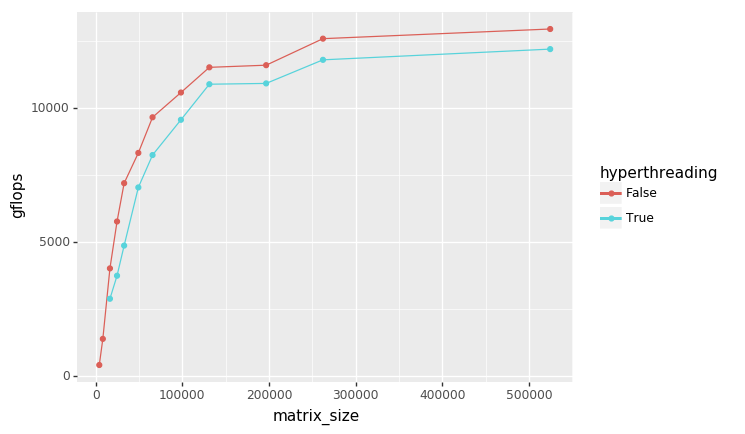

<ggplot: (-9223363247501625947)>

In [2]:
ggplot(df, aes(x='matrix_size', y='gflops', color='hyperthreading')) + geom_line() + geom_point()

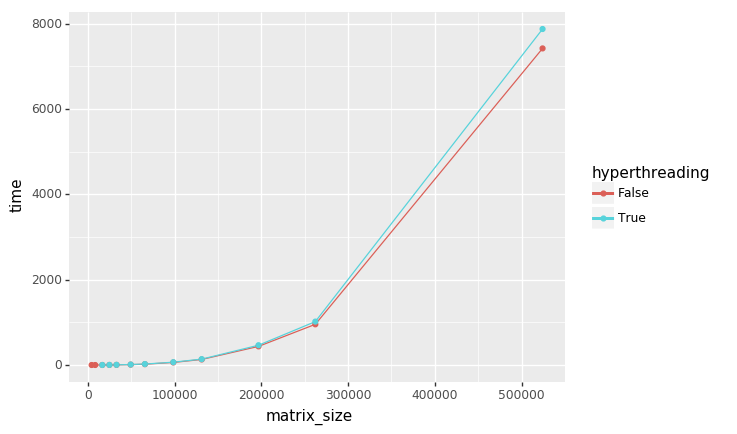

<ggplot: (-9223363247596714485)>

In [3]:
ggplot(df, aes(x='matrix_size', y='time', color='hyperthreading')) + geom_line() + geom_point()

In [4]:
df[df.matrix_size == 2**14]

,bcast,block_size,depth,gflops,matrix_size,mem_align,pfact,proc_p,proc_q,process_per_node,residual,rfact,swap,thread_per_process,time,hyperthreading
8,2,128,1,2885.0,16384,8,1,16,32,32,0.001602,2,0,1,1.02,True
8,2,128,1,4018.0,16384,8,1,16,32,32,0.001602,2,0,1,0.73,False


In [5]:
df[df.matrix_size == 2**15]

,bcast,block_size,depth,gflops,matrix_size,mem_align,pfact,proc_p,proc_q,process_per_node,residual,rfact,swap,thread_per_process,time,hyperthreading
0,2,128,1,4869.0,32768,8,1,16,32,32,0.001419,2,0,1,4.82,True
0,2,128,1,7197.0,32768,8,1,16,32,32,0.001419,2,0,1,3.26,False
